# Preprocess image

We're going to identify, extract, and ortho-rectify the image.

## Preliminaries

You will need the latest version of `skimage`.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from scipy import ndimage as ndi
from skimage import color, io, exposure, feature
from skimage.filters import threshold_otsu, threshold_sauvola
from skimage.morphology import remove_small_objects, disk, opening, dilation
from skimage.measure import find_contours, approximate_polygon
from skimage import segmentation
from skimage.future import graph
from skimage import transform as tf
from skimage.draw import polygon

%matplotlib inline

In [2]:
from mycarta import find_largest, rectify_seismic, remove_annotations

## Import test image

In [3]:
img = np.asarray(io.imread('data/test_f3_distorted_text.png'))[:,:,:3]

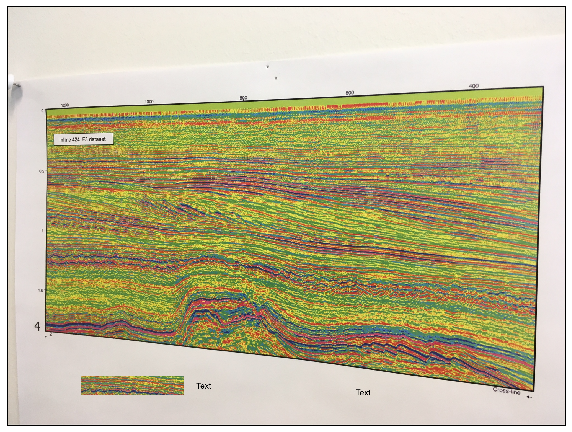

In [4]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.imshow(img,  interpolation = 'none')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
plt.show()

## Get section

In [5]:
mask = find_largest(img)

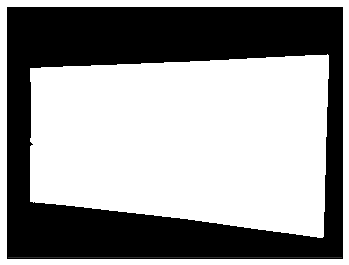

In [6]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plt.imshow(mask, cmap='gray', interpolation = 'none')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
plt.show()

In [7]:
warped = rectify_seismic(img, mask)

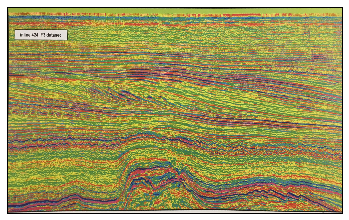

In [8]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plt.imshow(warped, cmap='gray', interpolation = 'none')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
plt.show()

In [9]:
clean = remove_annotations(warped)  # Add argument g=5 to add some smoothing.

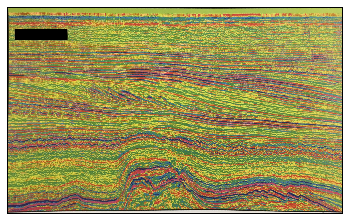

In [10]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plt.imshow(clean, cmap='gray', interpolation = 'none')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])

plt.savefig('data/test_f3_rectified.png', dpi=300)
plt.show()